### Part 1: HP Memristor Model ###

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.differentiate import derivative

In [2]:
R_on = 10 #ohm
R_off = 420
mu = 1.6*10**-12
D = 3*10**(-9) #m
p = 1 # empirical constant
I0 = 1*10**(-3) #initial current
wfrqu = 2*np.pi*(500)
V_plus = 0.37
V_minus = -0.19
i0 = 1*10**-3
i_off = 1*10**-5
i_on = 1
v0 = 0.6 #inital voltage

In [3]:
def V(t): 
    return v0*np.sin(wfrqu*t)

In [4]:
def M(x): 
    return R_on*(x) + R_off*(1-x)  

In [5]:
def I(t,x): 
    return V(t)/M(x)


In [6]:
def f(x): 
    return 1 - ((2*x - 1)**(2*1))

In [7]:
def wode(t , x): 
    
    if V(t) > V_plus: 
        return mu*(R_on/D**2)*(i_off/(I(t, x)-i0))*f(x)
    
    if V(t) < V_minus: 
        return mu*(R_on/D**2)*(I(t, x)/(i_on))*f(x)
    
    else: 
        return 0

In [8]:
tval = np.linspace(0, 0.009, 1000)
t = tval.reshape(1000,1)

y0 = [0.01]

x = solve_ivp(wode, (0,0.009), y0, t_eval = tval)
x_val = x.y[0]
x_val = x_val.reshape(1000,1)

In [9]:
i = I(t, x_val)
v = V(t)
m = M(x_val)
g = 1/m

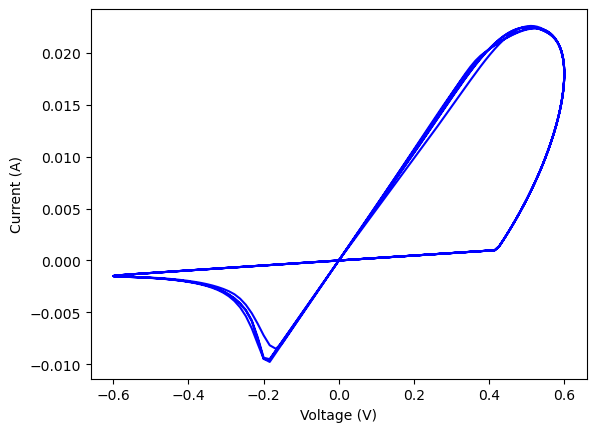

In [10]:
plt.plot(v, i, 'b')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_5290/2700899374.py:3: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("Memristance ($\Omega$)")


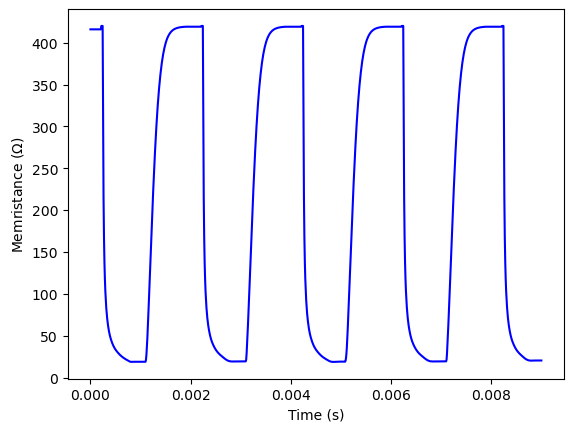

In [11]:
plt.plot(t, m, 'b')
plt.xlabel("Time (s)")
plt.ylabel("Memristance ($\Omega$)")
plt.show()

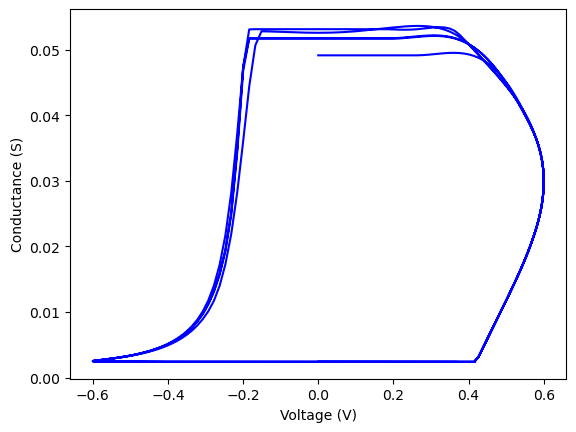

In [12]:
plt.plot(v, g, 'b')
plt.xlabel("Voltage (V)")
plt.ylabel("Conductance (S)")
plt.show()

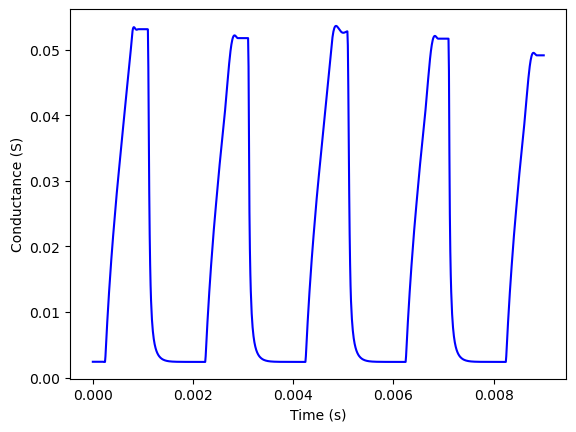

0.05366869999901543
0.002380951700027738


In [13]:
plt.plot(t, g, 'b')
plt.xlabel("Time (s)")
plt.ylabel("Conductance (S)")
#plt.xlim(0.00307, 0.00311)
#plt.ylim(0.068, 0.075)
plt.show()

print(np.max(g))
print(np.min(g))

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_5290/364250454.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta\omega$')


Text(0, 0.5, '$\\Delta\\omega$')

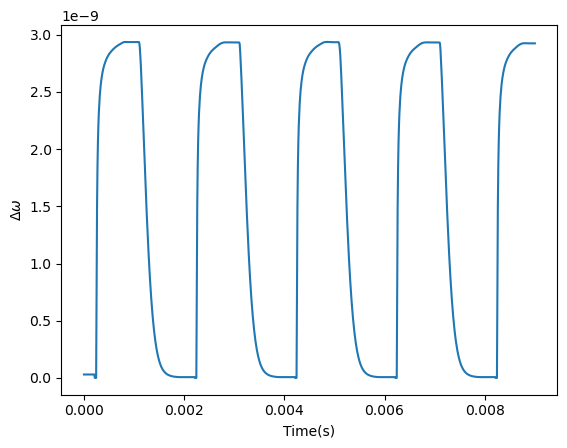

In [14]:
plt.plot(t , x_val*D)
plt.xlabel('Time(s)')
plt.ylabel('$\Delta\omega$')

(-0.0012, 0.00086)

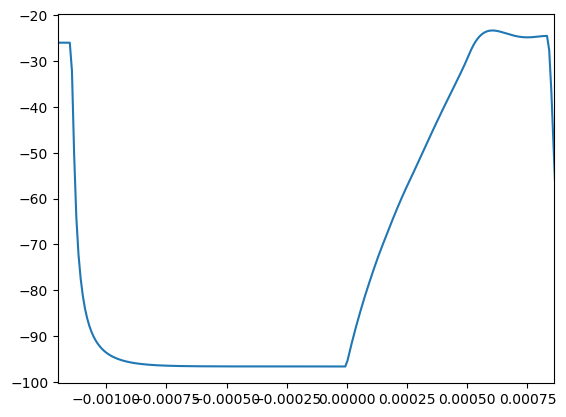

In [15]:
tau = 0.00425
dt = t - tau

dg = ((g - 0.07)/0.07)*100

plt.plot(dt, dg)
plt.xlim(-0.0012, 0.00086)

In [16]:
from scipy import signal

In [17]:
def vsq(t): 
    return 0.6*(signal.square(wfrqu*t))

def Isq(t,x): 
    return vsq(t)/M(x)

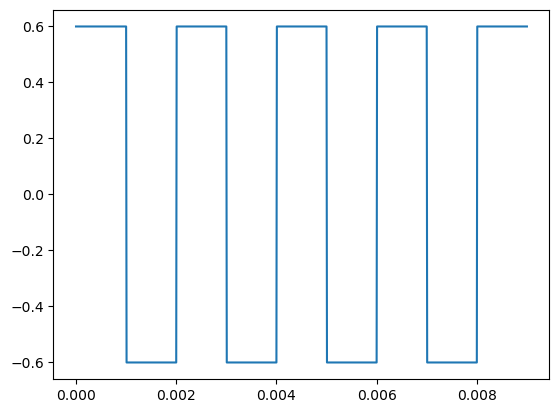

In [18]:
plt.plot(t, vsq(t))

In [19]:
def wodesq(t , x): 
    
    if vsq(t) > V_plus: 
        return mu*(R_on/D**2)*(i_off/(Isq(t, x)-i0))*f(x)
    
    if vsq(t) < V_minus: 
        return mu*(R_on/D**2)*(Isq(t, x)/(i_on))*f(x)
    
    else: 
        return 0

In [20]:
xsq = solve_ivp(wodesq, (0,0.009), y0, t_eval = tval)

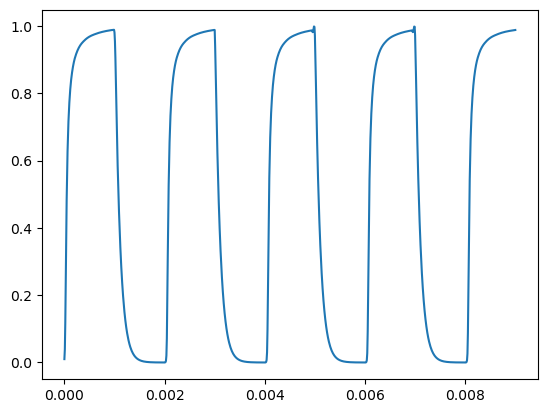

In [21]:
xs = xsq.y[0]
xs = xs.reshape(len(xs), 1)
plt.plot(t ,xs)

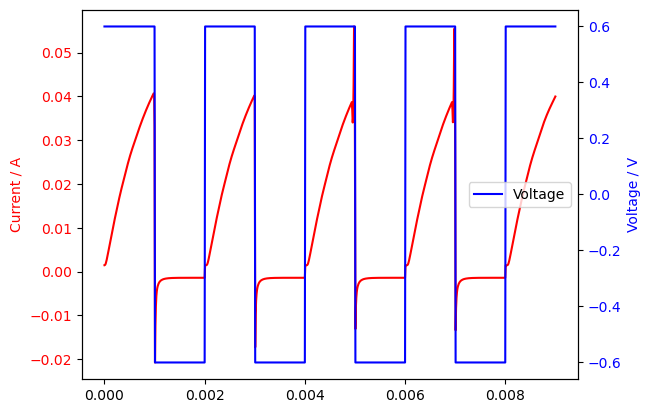

In [22]:
isq = Isq(t, xs)
vsq = vsq(t)

fig, ax1 = plt.subplots()
ax1.plot(t, isq, color='red', label = 'Current')
ax1.set_ylabel('Current / A', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(t, vsq, 'b', label = 'Voltage')
ax2.set_ylabel('Voltage / V', color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

Text(0, 0.5, 'Conductance / S')

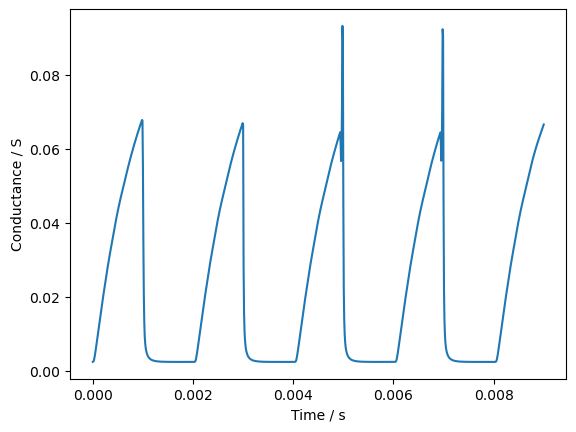

In [23]:
msq = M(xs)
gsq = 1/msq

plt.plot(t, gsq)
plt.xlabel('Time / s')
plt.ylabel('Conductance / S')
#plt.xlim(0.0048, 0.0052)

In [24]:
ap = 0.09 
am = 0.04
taup = 0.0003
taum = 0.0002 

dt = np.linspace(-0.005, 0.005, 1000)

In [25]:
def stdp(dt): 
    dt = np.array(dt)
    dg = np.zeros_like(dt)

    dg = np.where(dt>0, ap*np.exp(-dt/taup), dg)
    dg = np.where(dt<0, -am*np.exp(dt/taum), dg)

    return dg

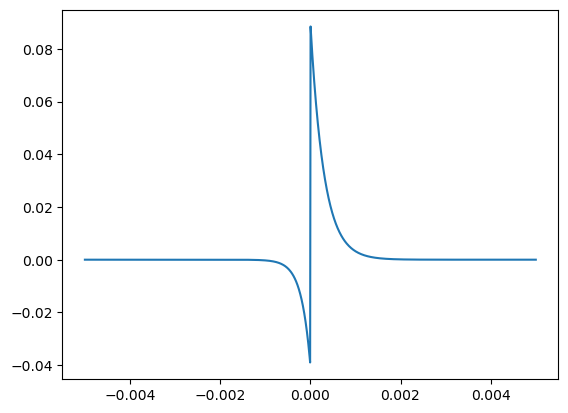

In [26]:
plt.plot(dt, stdp(dt))

### Part 1.2: Landau–Khalatnikov (L–K) ferroelectric model ###

In [27]:
alpha = -1
beta = 1 
gamma = 0.1
G0 = np.min(g)
k = 1*10**-6
P = [0]
max_g = np.max(g)
min_g = np.min(g)

In [28]:
def e(t): 
    return V(t)/D

$ \frac{dp}{dt} = -\gamma(2\alpha p + 4\beta p^3 - e(t))$

p = polarisation 

e(t) = electric field 

gamma, beta and alpha are abirtary constants

In [29]:
def dp(t, p): 
    return -gamma * (2*alpha*p + 4*beta*p**3 - e(t))
    

In [30]:
p = solve_ivp(dp, (0,0.009), P, t_eval = tval)
pval = p.y[0]
pval = pval.reshape(1000,1)

In [31]:
pmin = np.min(pval)
pmax = np.max(pval)

In [32]:
G = min_g + ((max_g - min_g)*((pval + pmax)/(2*pmax)))

Text(0.5, 0, 'Time (s)')

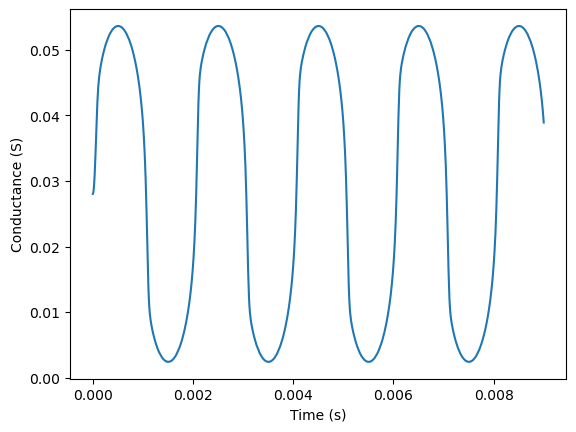

In [33]:
plt.plot(t, G)
#plt.xlim(0.001, 0.004)
plt.ylabel('Conductance (S)')
plt.xlabel('Time (s)')

Text(0, 0.5, 'Conductance (S)')

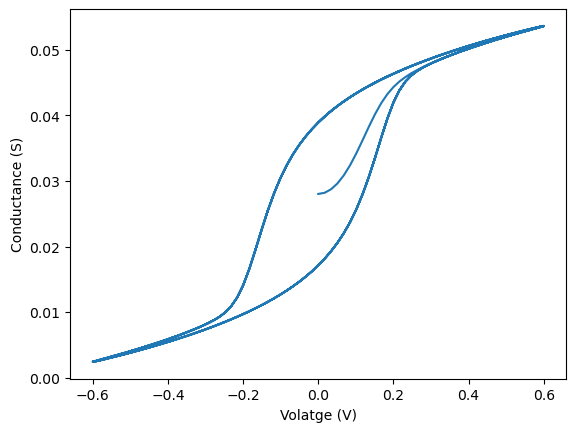

In [34]:
plt.plot(v, G)
plt.xlabel('Volatge (V)')
plt.ylabel('Conductance (S)')

$V_{th+} = +0.15V$

$V_{th-} = -0.21V$

(-0.3, 0.3)

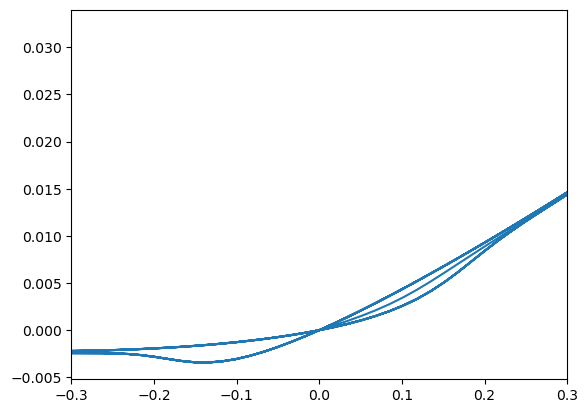

In [35]:
I = v*G
plt.plot(v, I)
plt.xlim(-0.3, 0.3)

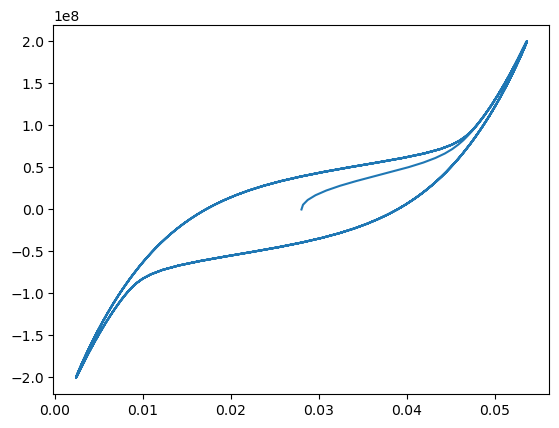

In [36]:
plt.plot(G,e(t))

In [37]:
def esq(t): 
    return vsq(t)/D

def dpsq(t, p): 
    return -gamma * (2*alpha*p + 4*beta*p**3 - esq(t))
    

In [38]:
psq = solve_ivp

### Part 2: STDP Model ###

In [39]:
tau = 0.0022 - 0.0015
dt = np.linspace(-0.02, 0.02, 10000)

In [40]:
def stdp(dt): 
    dt = np.array(dt)
    dw = np.zeros_like(dt)

    dw = np.where(dt>0, 0.01*np.exp(-dt/tau), dw)
    dw = np.where(dt<0, -0.01*np.exp(dt/tau), dw)

    return dw

In [41]:
dtv = dt.reshape(10000,1)

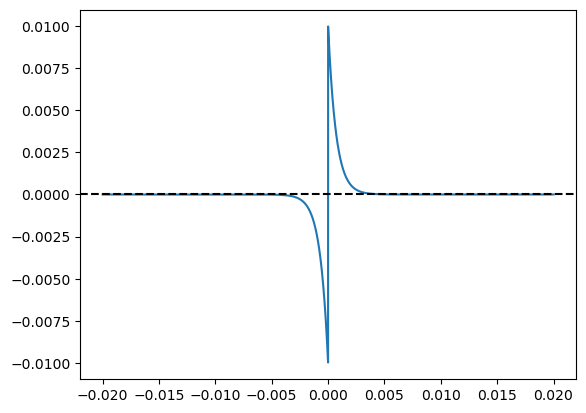

In [42]:
plt.plot(dtv, stdp(dtv))
plt.axhline(0, ls='--', color='black')

In [43]:
dgd = ((0.002 - 0.07)/0.07)*100
dgp = ((0.0824 - 0.07)/0.07)*100

In [44]:
def stdp(dt): 
    dt = np.array(dt)
    dw = np.zeros_like(dt)

    dw = np.where(dt>0, dgp*np.exp(-dt/tau), dw)
    dw = np.where(dt<0, dgd*np.exp(dt/tau), dw)

    return dw

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_5290/1947193273.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta G$')
/tmp/ipykernel_5290/1947193273.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$')


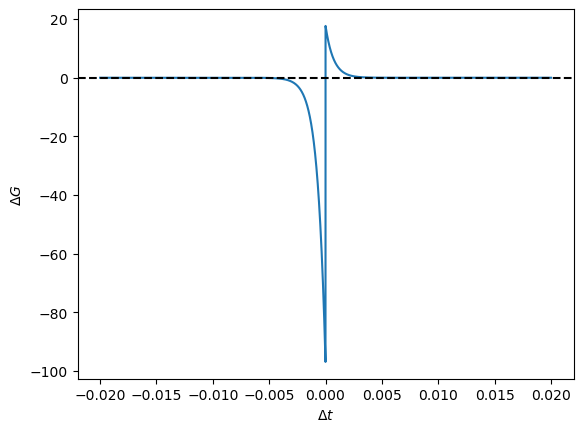

In [45]:
plt.plot(dt, stdp(dt))
plt.axhline(0, ls='--', color='black')
plt.ylabel('$\Delta G$')
plt.xlabel('$\Delta t$')
#plt.xlim(-0.005, 0.005)
plt.show()

In [46]:
V_1 = 0 #initial voltage 
V_2 = 0.6 #max voltage 
tdr = 0.001 #time delay before rising 
rt = 0.01 #rise time 
tdf = 0.005 #time before falling 
ft = 0.05 # fall time 

In [47]:
def expv(t): 
    t = np.array(t)
    ev = np.zeros_like(t)

    ev = np.where((tdr<t) & (t<=tdf) , V_1 + ((V_2 - V_1)*(1 - np.exp(-(t-tdr)/rt))), ev)
    ev = np.where(t>tdf, V_2 - (V_2 - V_1)*((np.exp(-(t-tdf)/ft)) - (np.exp(-(t-tdr)/rt))), ev)

    return ev

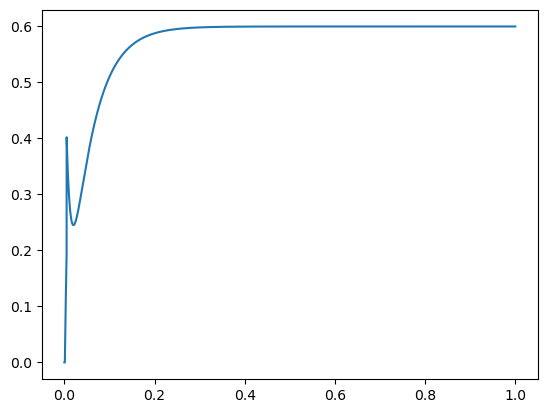

In [48]:
tt = np.linspace(0, 1, 10000)
plt.plot(tt, expv(tt))

$\tau \frac{dV}{dt} = E_l - V + R_{m} I_{e}$

In [49]:
t_m = 0.02 #membrane time constant
i_e =  0.06 #input current 
e_l = -2 #resting potential of neuron 
r_m = 100 # membrane resistance 

In [50]:
def dv(t, v): 
    return (e_l - v + (r_m*i_e))/t_m

In [51]:
tnew = np.linspace(0, 0.05, 1000)
tvnew = tnew.reshape(1000,1)

In [52]:
V = np.zeros_like(tnew)

for i in range(1, len(tnew)): 
    V[i] = V[i-1] + 0.0001*((-V[i-1]+(r_m*i_e))/t_m)
    if V[i] >= 2: 
        V[i] = -2
v_new = V.reshape(1000, 1)

Text(0, 0.5, 'Voltage / V')

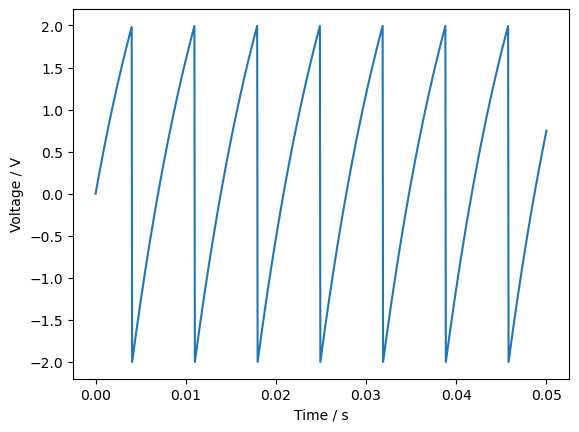

In [53]:
plt.plot(tvnew, v_new)
plt.xlabel('Time / s')
plt.ylabel('Voltage / V')

In [54]:
def wnew(t , x): 
    
    if v_new(t) > V_plus: 
        return mu*(R_on/D**2)*(i_off/(I(t, x)-i0))*f(x)
    
    if v_new(t) < V_minus: 
        return mu*(R_on/D**2)*(I(t, x)/(i_on))*f(x)
    
    else: 
        return 0

In [55]:
def x(t, x): 
    tnew = np.array(tnew)
    xval = np.zeros_like(tnew)

    np.where(v_new>V_plus, mu*(R_on/D**2)*(i_off/(I(t, x)-i0))*f(x))

### STDP 2.0 ###

In [56]:
t_pre = 0.005
t_post2 = 0.007
t_post1 = 0.003
sigma = 0.0003

In [57]:
def V_pre(t): 
    return 0.6*np.exp(-(t-t_pre)**2/(2*sigma**2))

def V_post1(t): 
    return -0.6*np.exp(-(t-t_post1)**2/(2*sigma**2))

def V_post2(t): 
    return -0.6*np.exp(-(t-t_post2)**2/(2*sigma**2))

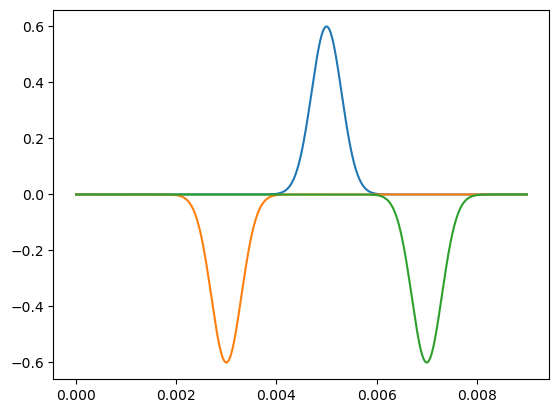

In [58]:
plt.plot(t, V_pre(t))
plt.plot(t, V_post1(t))
plt.plot(t, V_post2(t))

In [59]:
vpre = V_pre(t)
vpost1 = V_post1(t)
vpost2 = V_post2(t)

In [60]:
def v_comb(t): 
    return V_pre(t) + V_post1(t) + V_post2(t)


In [61]:
dt = t - 0.005

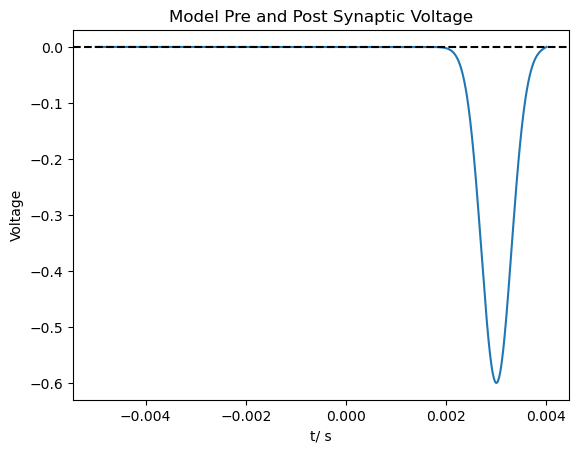

In [79]:
plt.plot(dt, v_comb(dt))
plt.xlabel('t/ s')
plt.ylabel('Voltage')
plt.axhline(0, ls='--', color='black')
plt.title('Model Pre and Post Synaptic Voltage')
plt.show()

In [71]:
def Istdp(t,x): 
    return v_comb(t)/M(x)

print(Istdp(0.002, 0.5))

-1.0788614342714801e-05


In [72]:
def xstdp(t , x): 
    
    if v_comb(t) > V_plus: 
        return mu*(R_on/D**2)*(i_off/(Istdp(t, x)-i0))*f(x)
    
    if v_comb(t) < V_minus: 
        return mu*(R_on/D**2)*(Istdp(t, x)/(i_on))*f(x)
    
    else: 
        return 0

In [73]:
xstdp = solve_ivp(xstdp, (0,0.009), y0, t_eval = tval)

In [74]:
xst = xstdp.y[0]
xst = xst.reshape(1000,1)

In [77]:
mst = M(xst)
gst = 1/mst

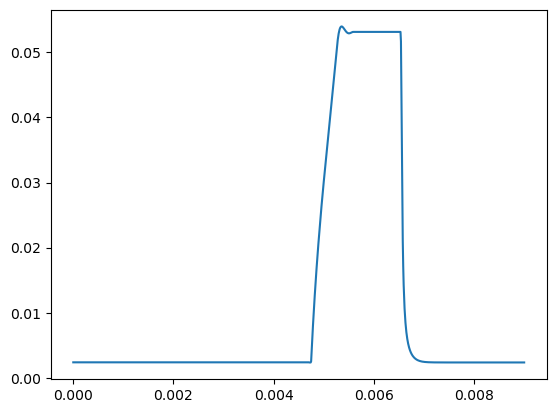

In [78]:
plt.plot(t, gst)